In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Remember that wcword is different from word or token in usual sense! 
!man wc|grep -A 2 -B 1 "A word is"

       Print newline, word, and byte counts for each FILE, and a total line if
       more than one FILE is specified.  A word is a non-zero-length  sequence
       of characters delimited by white space.



# Load data

In [3]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['crawl'] = str(stats_dir)
    return df

ldf = pd.concat((load_lang_stat(d) 
                 for d in Path('.').glob('*filtered_stats*')
                ), ignore_index=True)
print(ldf.crawl.value_counts())
ldf

crawl
wide00017_filtered_stats_utf8    222
cc40_filtered_stats_utf8         217
wide00015_filtered_stats_utf8    215
wide00016_filtered_stats         215
Name: count, dtype: int64


,lang,text_newlines,text_wcwords,text_bytes,docs,crawl
0,aa,397181,2490504,20866640,9194,wide00017_filtered_stats_utf8
1,ab,107611,379880,5205238,1986,wide00017_filtered_stats_utf8
2,af,52483967,249354065,1675412979,197504,wide00017_filtered_stats_utf8
3,ak,1523176,3890002,24849541,16203,wide00017_filtered_stats_utf8
4,am,7062590,40050947,405151481,48869,wide00017_filtered_stats_utf8
...,...,...,...,...,...,...
864,za,1392,1392,8298360,1392,wide00016_filtered_stats
865,zh,1319403113,1319403113,13380494375493,1319403113,wide00016_filtered_stats
866,zh-Hant,88371859,88371859,975072255535,88371859,wide00016_filtered_stats
867,zu,37079,37079,242271227,37079,wide00016_filtered_stats


In [4]:
linf = pd.read_csv('./_langs/code2name_cld2.tsv', sep='\t')
linf

,Code,Name
0,aa,afar
1,ab,abkhazian
2,af,afrikaans
3,ak,akan
4,am,amharic
...,...,...
165,za,zhuang
166,zh,chinese
167,zh-Hant,chineset
168,zu,zulu


In [5]:
ldf = ldf.merge(linf, how='left',left_on='lang',right_on='Code')
ldf[ldf['Name'].isnull()]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
156,xx-Avst,231,467,2805,2,wide00017_filtered_stats_utf8,NaN,NaN
157,xx-Bali,161,236,1215,1,wide00017_filtered_stats_utf8,NaN,NaN
158,xx-Bamu,13095,14409,89310,9,wide00017_filtered_stats_utf8,NaN,NaN
159,xx-Batk,93,167,924,1,wide00017_filtered_stats_utf8,NaN,NaN
160,xx-Bopo,2567,4827,37530,26,wide00017_filtered_stats_utf8,NaN,NaN
...,...,...,...,...,...,...,...,...
857,xx-Ugar,1,1,4097,1,wide00016_filtered_stats,NaN,NaN
858,xx-Vaii,315,315,1435603,315,wide00016_filtered_stats,NaN,NaN
859,xx-Xpeo,1,1,1993,1,wide00016_filtered_stats,NaN,NaN
860,xx-Xsux,895,895,7580999,895,wide00016_filtered_stats,NaN,NaN


In [6]:
ldf.sample(10)

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name
178,xx-Linb,322,457,2806,2,wide00017_filtered_stats_utf8,NaN,NaN
239,bs,73511887,458653185,3261298042,573400,wide00015_filtered_stats_utf8,bs,bosnian
359,ti,1586345,13998701,148541780,12081,wide00015_filtered_stats_utf8,ti,tigrinya
866,zh-Hant,88371859,88371859,975072255535,88371859,wide00016_filtered_stats,zh-Hant,chineset
33,et,579107605,2136384266,16800579875,2836780,wide00017_filtered_stats_utf8,et,estonian
739,mg,62583,62583,467091327,62583,wide00016_filtered_stats,mg,malagasy
628,xx-Phnx,2349,5559,41836,6,cc40_filtered_stats_utf8,NaN,NaN
492,ia,2676400,12791833,101544579,29515,cc40_filtered_stats_utf8,ia,interlingua
550,ru,33859564732,170591093406,2237772461698,163993406,cc40_filtered_stats_utf8,ru,russian
671,bs,917409,917409,7195576609,917409,wide00016_filtered_stats,bs,bosnian


In [7]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='crawl', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)], fpath=None):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect, 
                        hue_order=None if part_col is None else sorted(ldf[part_col].unique()))
    if logscale:
        plt.xscale('log')
    plt.xlabel('')
    plt.ylabel('')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)
    if fpath:
        my_plot.savefig(fpath)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


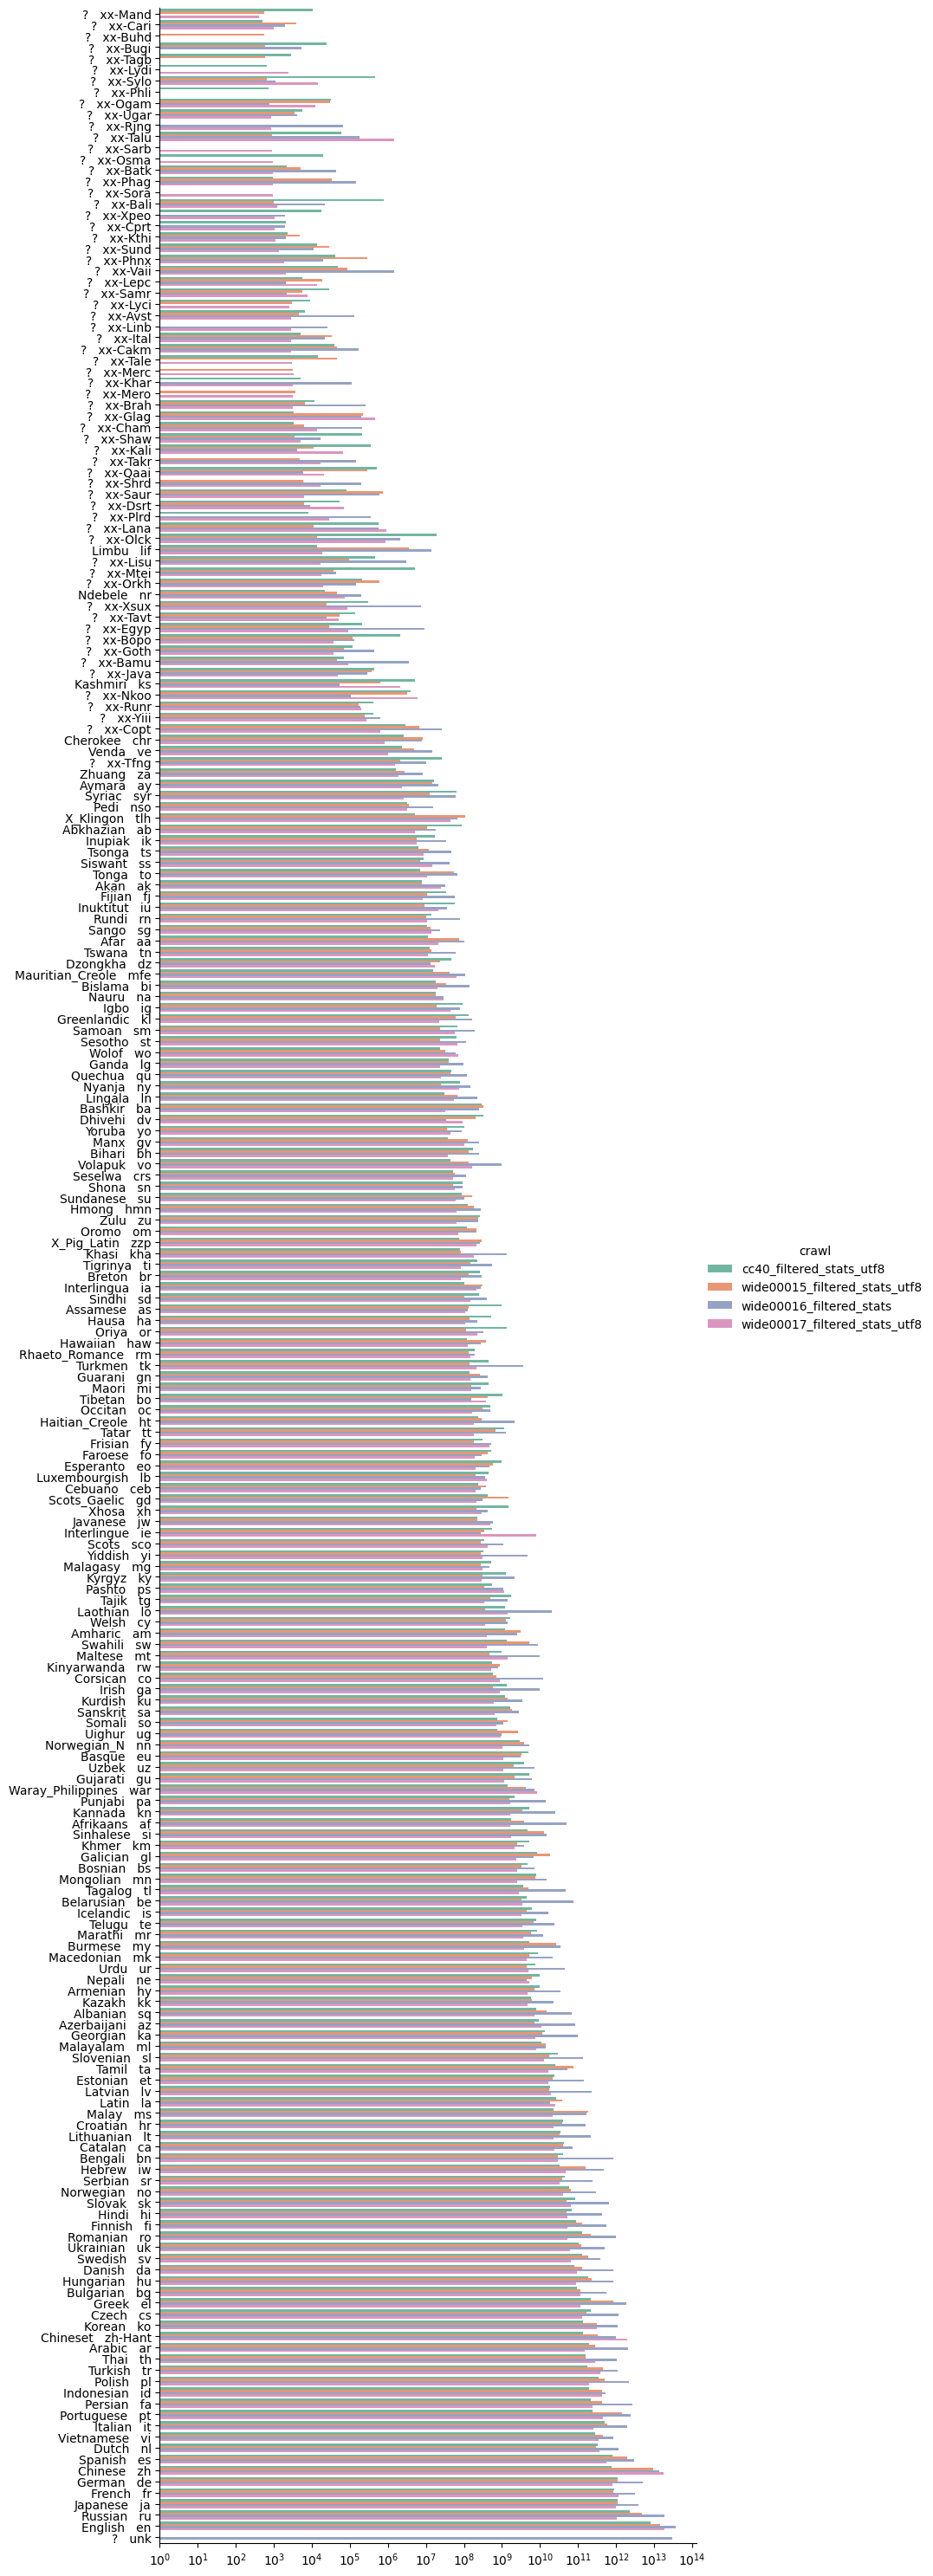

In [8]:
ldf['lang-descr'] = ldf.Name.fillna('?').str.title() + '   ' + ldf.lang
ldf=ldf.sort_values(by='text_bytes')    
plot_langs(ldf)

In [9]:
ldf['lang_props'] = ldf.groupby(['crawl'])['text_bytes'].transform(lambda r: r/r.sum())

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


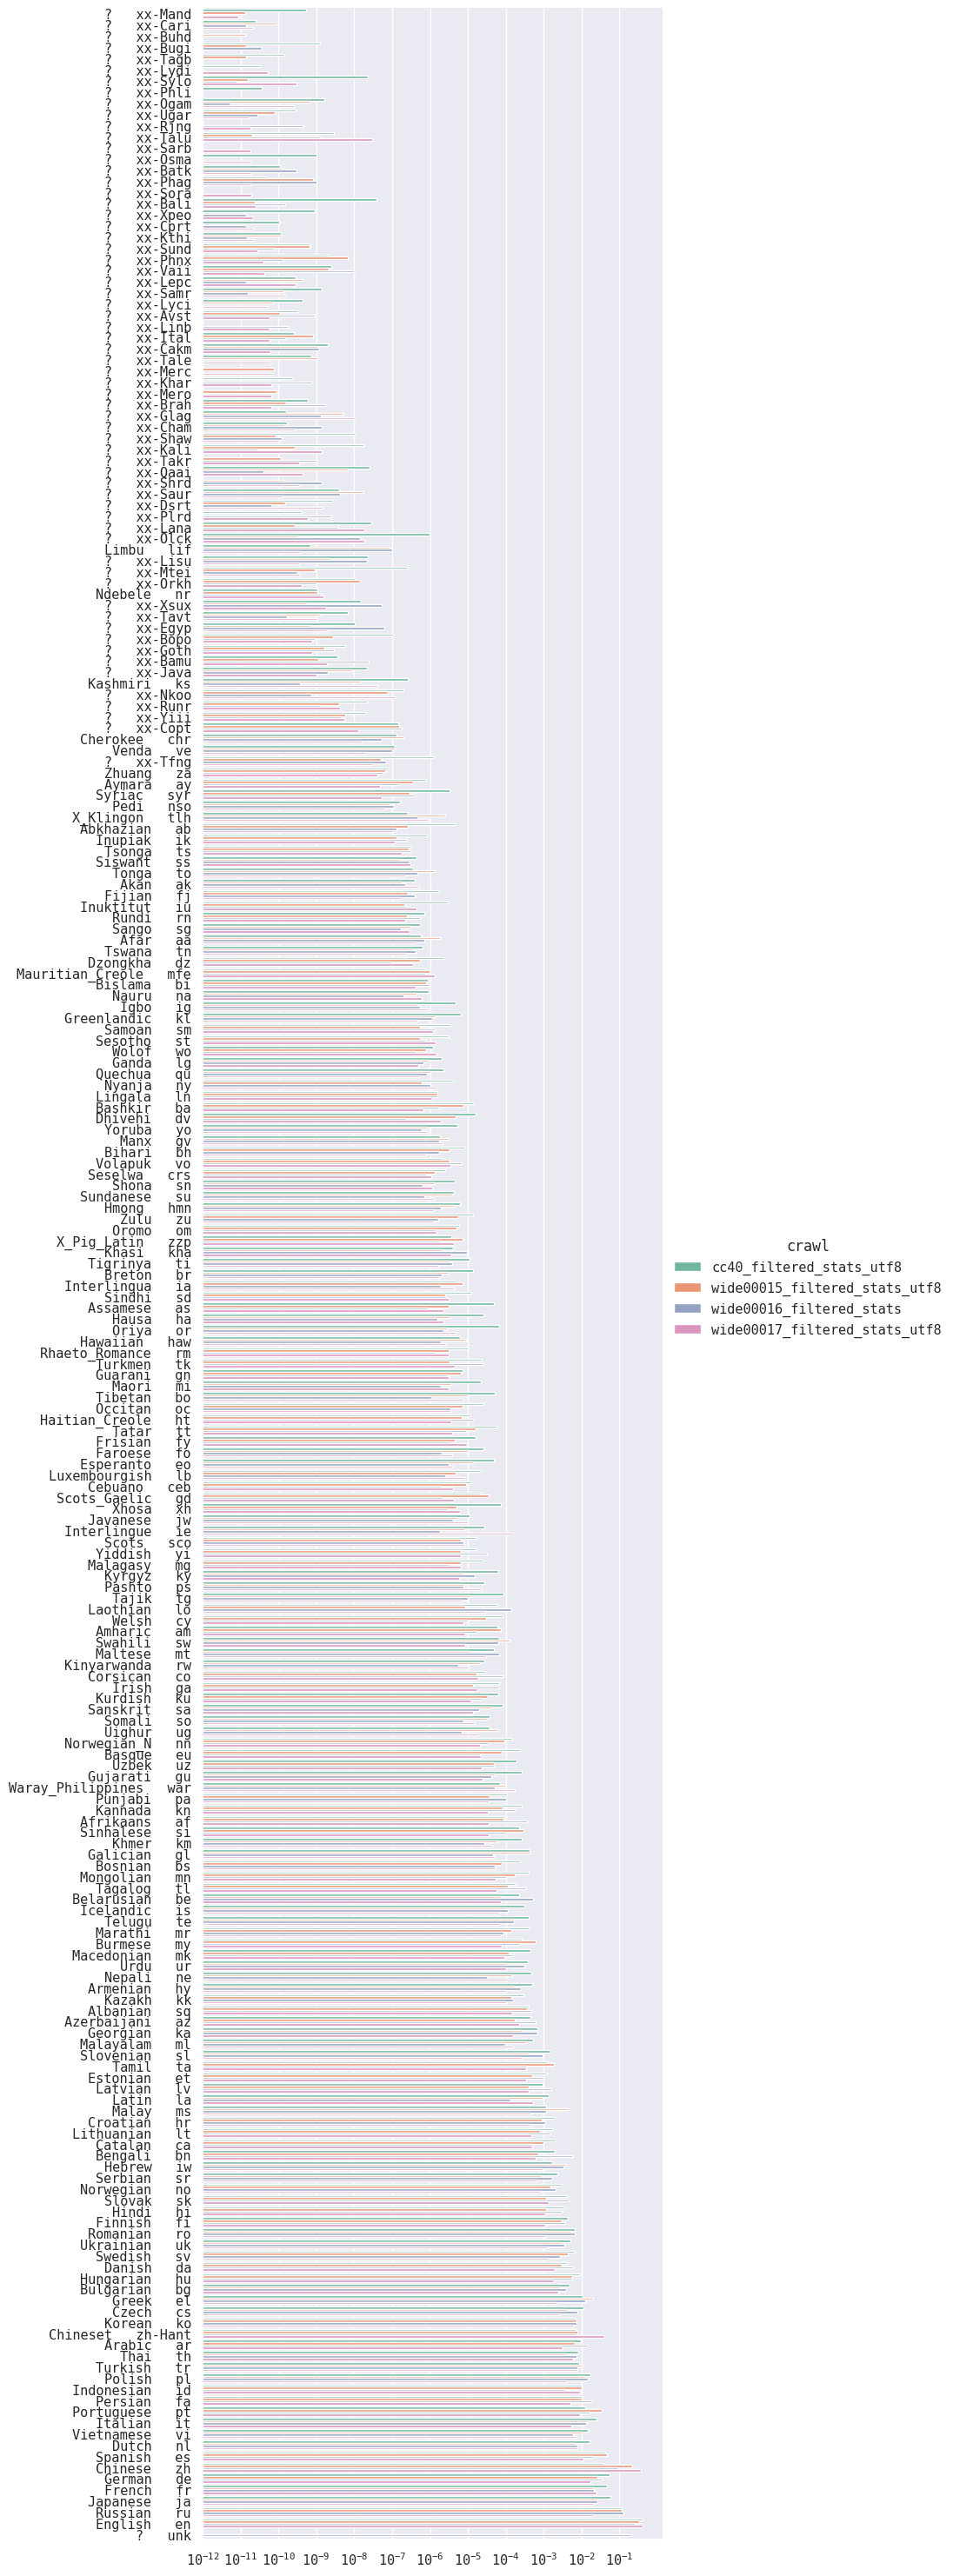

In [10]:
plot_langs(ldf, stat_col='lang_props', xticks=10.**np.arange(-12,0,))

# Plot languages listed in the project proposal

In [11]:
from pathlib import Path
lang2set = [(l,i) for i in range(1,6) for l in pd.read_csv(f'_langs/langs_{i}.txt', header=None)[0] ]

lang2set = pd.DataFrame(lang2set, columns=['lang','set'])
print(len(lang2set))
print(lang2set.set.value_counts())

77
set
5    31
3    22
4    19
2     4
1     1
Name: count, dtype: int64


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


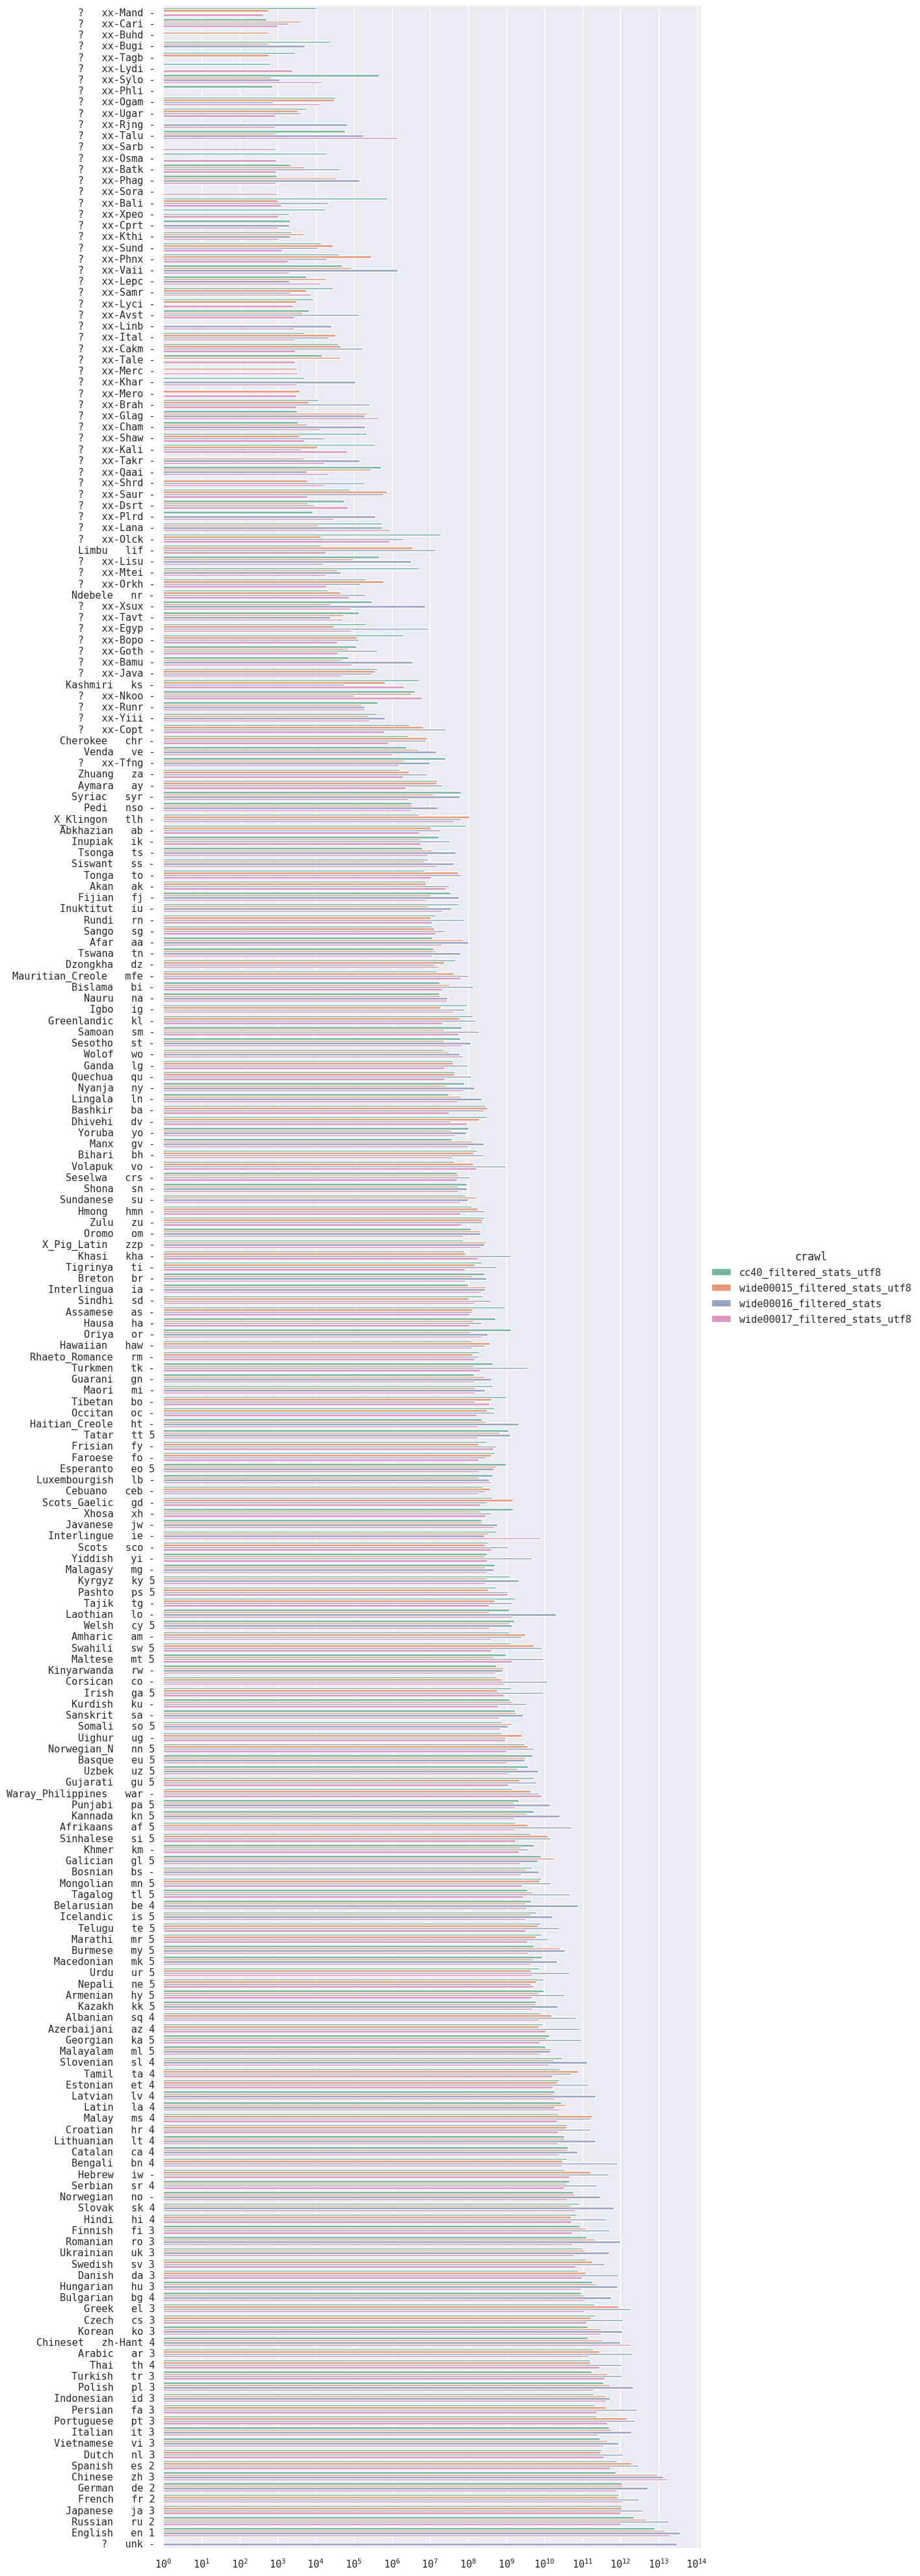

In [12]:
plot_df = ldf.merge(lang2set, on='lang', how='left')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' + plot_df.set.apply(lambda r: '-' if pd.isna(r) else str(int(r)))
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=40)

In [13]:
# he stands for Hebrew
ldf[ldf.Name.str.contains('hebrew').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
500,iw,560148949,3333091756,32860518640,3539103,cc40_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.001657
63,iw,1081227042,4744613631,46131686574,5463218,wide00017_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.000961
285,iw,2911599978,15577696848,161465723731,8216811,wide00015_filtered_stats_utf8,iw,hebrew,Hebrew iw,0.003849
717,iw,29552732,29552732,485435128800,29552732,wide00016_filtered_stats,iw,hebrew,Hebrew iw,0.003375


In [14]:
# nb stands for Norwegian (Bokmål)
ldf[ldf.Name.str.contains('norwegian').fillna(False)]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props
97,nn,39401284,150905235,1025643543,246884,wide00017_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000021
534,nn,109918286,409408271,2995985345,581065,cc40_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000151
319,nn,124496044,571587124,3768153257,533375,wide00015_filtered_stats_utf8,nn,norwegian_n,Norwegian_N nn,0.000090
751,nn,495188,495188,5206293824,495188,wide00016_filtered_stats,nn,norwegian_n,Norwegian_N nn,0.000036
98,no,1727627833,5841600717,40073256568,6348935,wide00017_filtered_stats_utf8,no,norwegian,Norwegian no,0.000835
535,no,1646643214,8574629934,57997268232,9891840,cc40_filtered_stats_utf8,no,norwegian,Norwegian no,0.002925
320,no,2020019858,10079748088,63442991936,8735018,wide00015_filtered_stats_utf8,no,norwegian,Norwegian no,0.001512
752,no,36928686,36928686,292206857622,36928686,wide00016_filtered_stats,no,norwegian,Norwegian no,0.002032


In [15]:
lang2set = lang2set.replace({'he':'iw', 'nb':'no'})

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


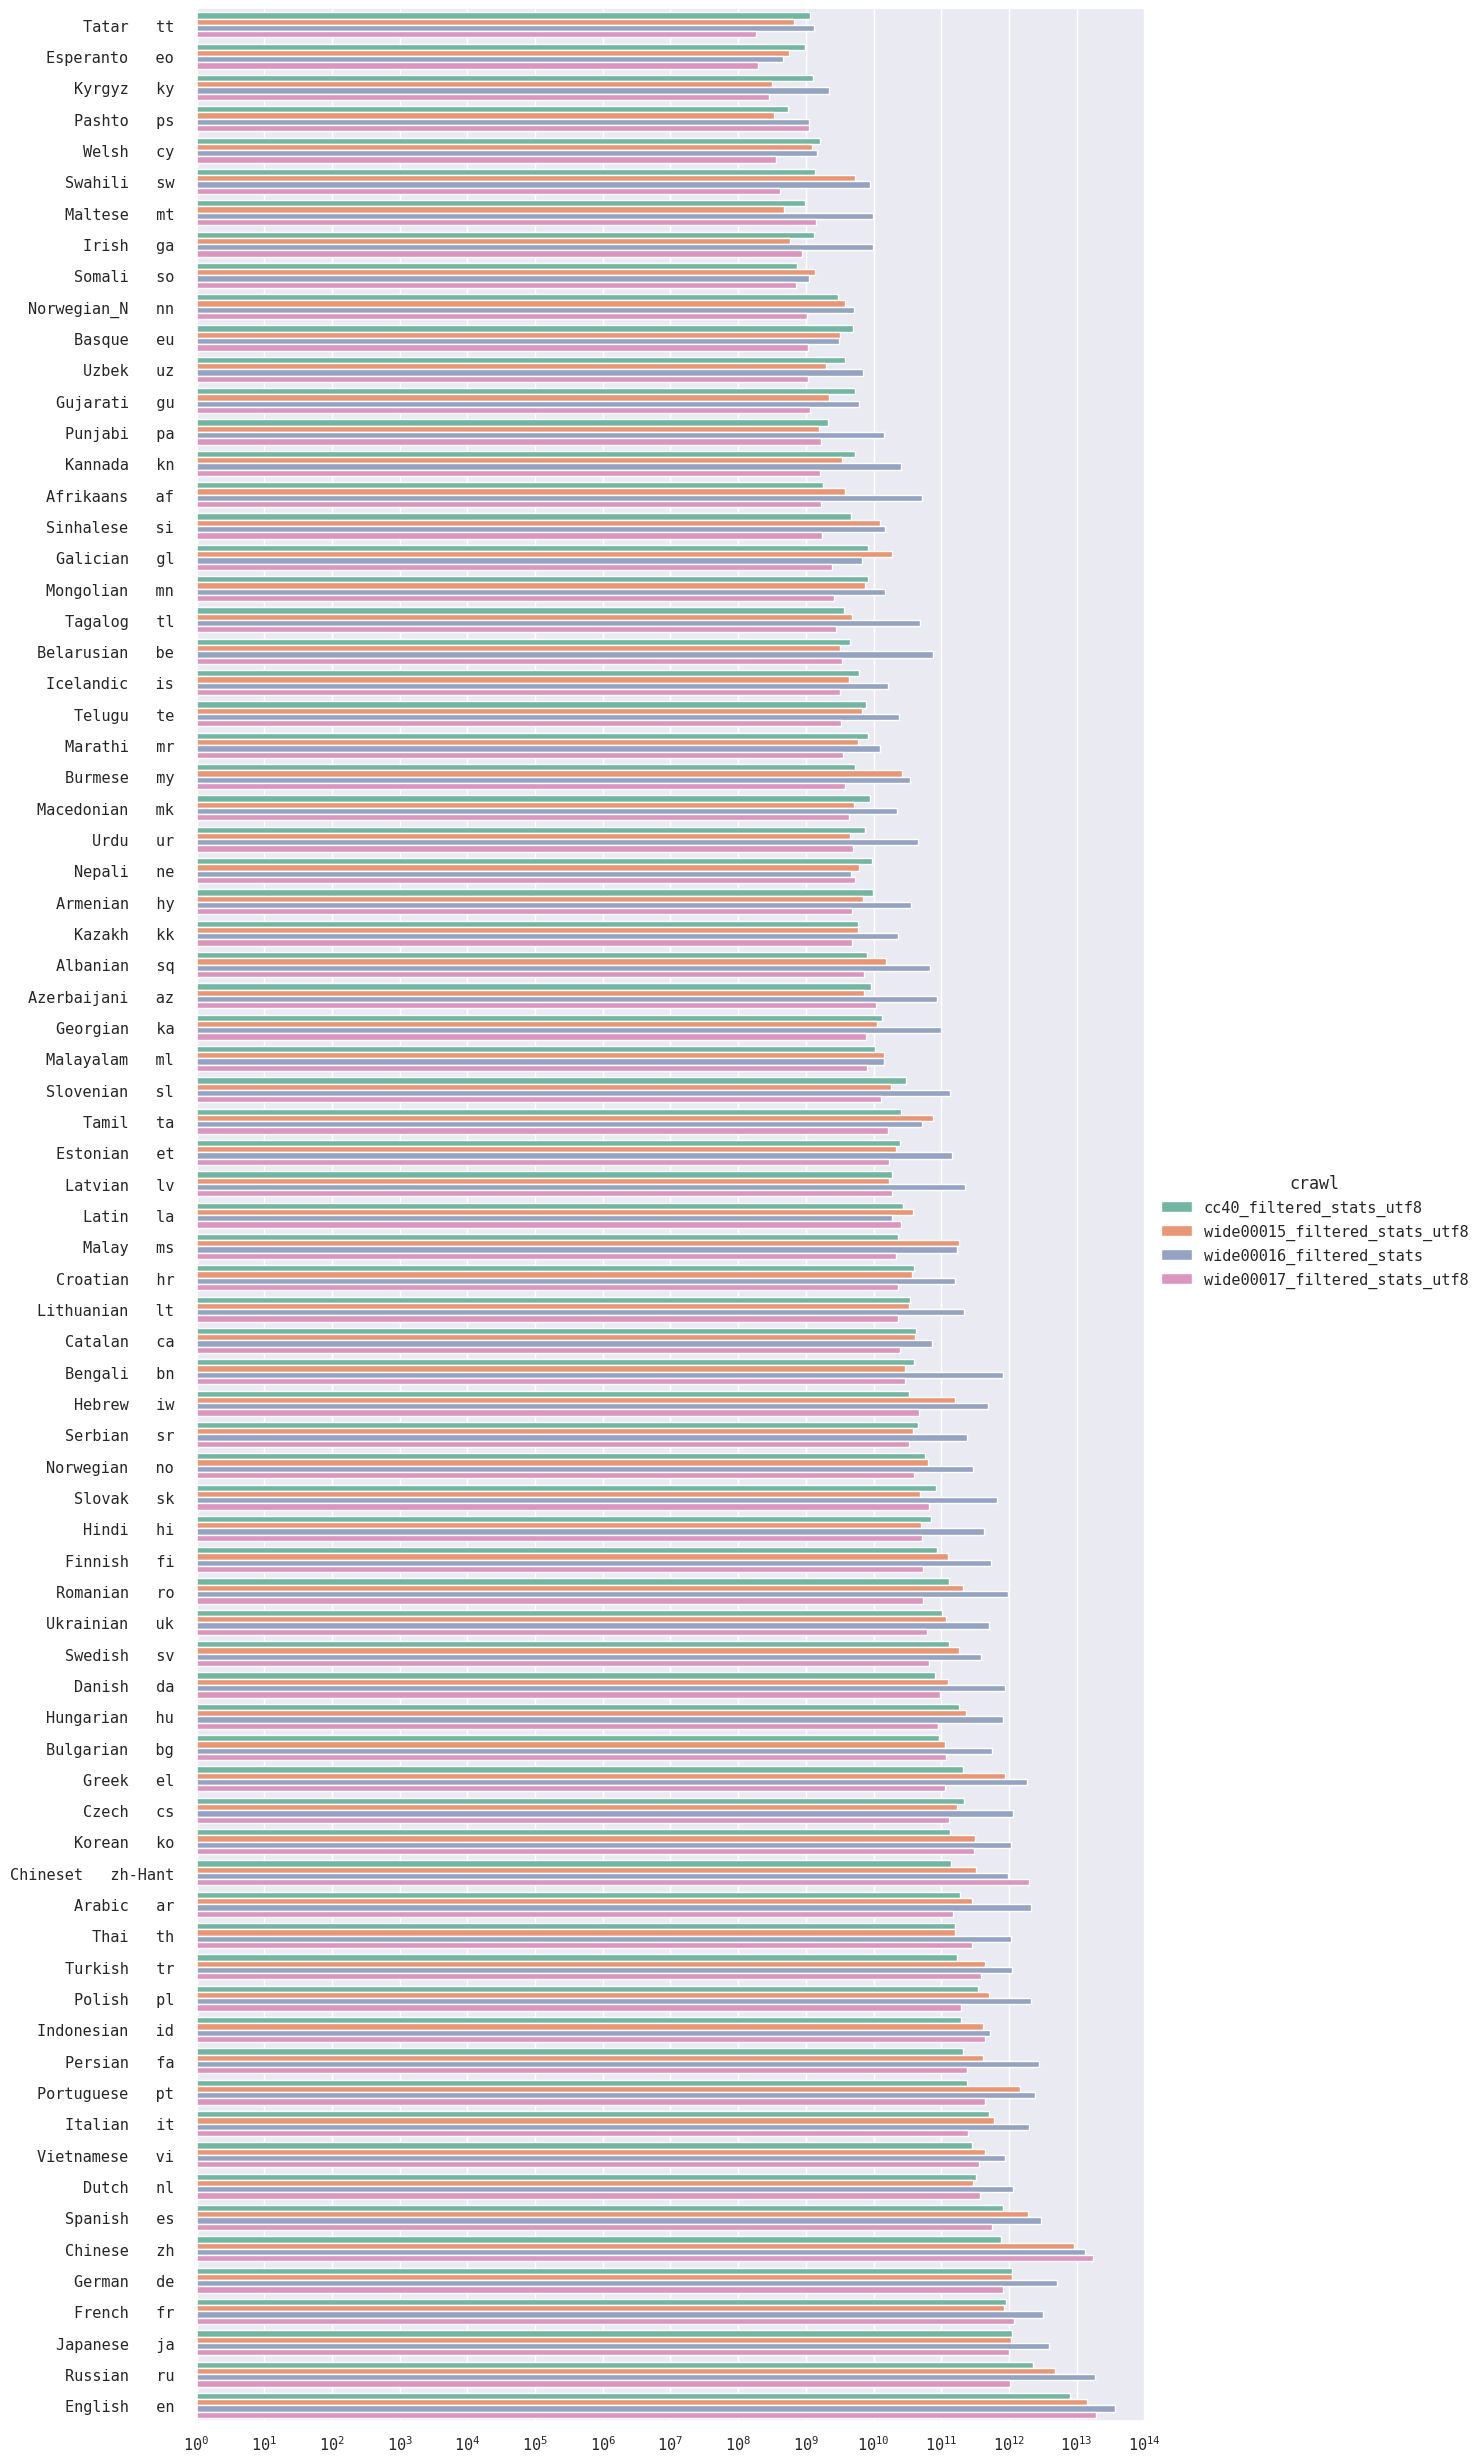

In [16]:
plot_df = ldf.merge(lang2set, on='lang', how='right')
plot_df['lang-descr'] = plot_df.Name.fillna('?').str.title() + '   ' + plot_df.lang + ' ' #+ plot_df.set.astype(str)
plot_df = plot_df.fillna(0.0).sort_values(by='text_bytes')
plot_langs(plot_df, height=25, aspect=0.5)

In [17]:
gdf = plot_df.groupby('lang').agg('sum').drop(columns=['set'])
gdf.describe()

,text_newlines,text_wcwords,text_bytes,docs,lang_props
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,77.000000
mean,3.530766e+10,1.565738e+11,2.901269e+12,3.780818e+08,0.049187
std,1.484794e+11,7.307790e+11,1.028558e+13,1.624008e+09,0.180788
min,2.912196e+07,1.413980e+08,2.198867e+09,3.136270e+05,0.000066
25%,2.427500e+08,1.244569e+09,3.571048e+10,2.509536e+06,0.000699
50%,1.970250e+09,8.716822e+09,2.073053e+11,2.131001e+07,0.003821
75%,1.553931e+10,6.298509e+10,1.659650e+12,1.385369e+08,0.025787
max,1.189117e+12,6.300561e+12,7.752305e+13,1.276065e+10,1.387095


In [18]:
langs1=gdf.sort_values(by='text_bytes').head(40).index.to_list()
langs2=gdf.sort_values(by='text_bytes').tail(len(gdf)-40).index.to_list()

In [19]:
plot_df[plot_df['lang-descr'].str.contains('Pashto')]

,lang,text_newlines,text_wcwords,text_bytes,docs,crawl,Code,Name,lang-descr,lang_props,set
272,ps,4144873,40183230,338033952,34590,wide00015_filtered_stats_utf8,ps,pashto,Pashto ps,0.000008,5
273,ps,9261914,65746735,539012433,71332,cc40_filtered_stats_utf8,ps,pashto,Pashto ps,0.000027,5
274,ps,87615,87615,1097383887,87615,wide00016_filtered_stats,ps,pashto,Pashto ps,0.000008,5
275,ps,30165791,139781104,1117237639,120090,wide00017_filtered_stats_utf8,ps,pashto,Pashto ps,0.000023,5


# Build Table 4.2 from the report

In [20]:
q=plot_df.groupby('lang-descr').agg('sum').drop(columns=['set', 'lang_props']).sort_values(by='text_bytes').drop(columns=['lang','Name','Code','crawl'])
lang_order = list(q.index)
q.loc['Total'] = q.sum(numeric_only=True)
q=q*1.0
q.to_csv('qwer.csv', float_format="%.2e", sep='\t')
!cat qwer.csv

lang-descr	text_newlines	text_wcwords	text_bytes	docs
Esperanto   eo 	4.45e+07	2.46e+08	2.20e+09	4.01e+05
Pashto   ps 	4.37e+07	2.46e+08	3.09e+09	3.14e+05
Tatar   tt 	4.02e+07	1.75e+08	3.30e+09	3.70e+05
Somali   so 	5.92e+07	4.25e+08	3.92e+09	6.78e+05
Kyrgyz   ky 	2.91e+07	1.41e+08	4.03e+09	3.45e+05
Welsh   cy 	9.29e+07	4.61e+08	4.65e+09	7.35e+05
Basque   eu 	2.73e+08	1.24e+09	1.23e+10	2.29e+06
Irish   ga 	8.08e+07	4.10e+08	1.25e+10	2.73e+06
Maltese   mt 	1.21e+08	4.04e+08	1.25e+10	9.31e+05
Norwegian_N   nn 	2.74e+08	1.13e+09	1.30e+10	1.86e+06
Uzbek   uz 	1.22e+08	6.34e+08	1.38e+10	1.37e+06
Gujarati   gu 	1.34e+08	7.01e+08	1.48e+10	9.28e+05
Swahili   sw 	1.95e+08	1.11e+09	1.59e+10	2.20e+06
Punjabi   pa 	7.43e+07	4.73e+08	1.96e+10	2.41e+06
Nepali   ne 	2.24e+08	1.44e+09	2.55e+10	2.12e+06
Marathi   mr 	2.23e+08	1.24e+09	3.02e+10	1.64e+06
Icelandic   is 	4.56e+08	1.86e+09	3.03e+10	3.87e+06
Mongolian   mn 	2.51e+08	1.54e+09	3.30e+10	2.51e+06
Sinhalese   si 	2.01e+08	1.47e+09	3.39e+10	1.37e

In [21]:
 plot_df.sort_values(by='lang-descr', key=lambda column: column.map(lambda e: lang_order.index(e)), inplace=True)

In [22]:
plot_df.drop(columns=['set']).groupby('crawl').describe().transpose()

crawl                cc40_filtered_stats_utf8  wide00015_filtered_stats_utf8  \
text_newlines count              7.700000e+01                   7.700000e+01   
              mean               6.049031e+09                   1.389784e+10   
              std                2.424182e+10                   5.313784e+10   
              min                9.261914e+06                   4.144873e+06   
              25%                9.406427e+07                   9.307564e+07   
              50%                6.156575e+08                   7.026303e+08   
              75%                3.722365e+09                   5.740533e+09   
              max                2.076352e+11                   4.016597e+11   
text_wcwords  count              7.700000e+01                   7.700000e+01   
              mean               3.192456e+10                   6.358278e+10   
              std                1.396576e+11                   2.675354e+11   
              min                6.574674e+07                   2.352875e+07   
              25%                5.223190e+08                   5.689236e+08   
              50%                3.333092e+09                   4.159281e+09   
              75%                1.849439e+10                   2.963771e+10   
              max                1.206122e+12                   2.276109e+12   
text_bytes    count              7.700000e+01                   7.700000e+01   
              mean               2.570741e+11                   5.443446e+11   
              std                9.463076e+11                   1.972137e+12   
              min                5.390124e+08                   3.131111e+08   
              25%                5.357566e+09                   5.097426e+09   
              50%                2.702866e+10                   3.308399e+10   
              75%                1.594368e+11                   2.317787e+11   
              max                7.904782e+12                   1.410263e+13   
docs          count              7.700000e+01                   7.700000e+01   
              mean               3.640442e+07                   6.648312e+07   
              std                1.513637e+08                   2.799051e+08   
              min                7.133200e+04                   3.459000e+04   
              25%                5.810650e+05                   4.135710e+05   
              50%                3.539103e+06                   2.670062e+06   
              75%                1.925805e+07                   2.599131e+07   
              max                1.303529e+09                   2.213464e+09   
lang_props    count              7.700000e+01                   7.700000e+01   
              mean               1.296378e-02                   1.297708e-02   
              std                4.772057e-02                   4.701539e-02   
              min                2.718142e-05                   7.464512e-06   
              25%                2.701723e-04                   1.215217e-04   
              50%                1.363006e-03                   7.887162e-04   
              75%                8.040107e-03                   5.525562e-03   
              max                3.986238e-01                   3.362041e-01   

crawl                wide00016_filtered_stats  wide00017_filtered_stats_utf8  
text_newlines count              7.700000e+01                   7.700000e+01  
              mean               1.406879e+08                   1.522011e+10  
              std                5.317237e+08                   7.336471e+10  
              min                6.974600e+04                   4.469660e+06  
              25%                1.280440e+06                   5.248397e+07  
              50%                1.085894e+07                   6.269566e+08  
              75%                7.724791e+07                   3.468564e+09  
              max                4.403491e+09                   5.754183e+11  
text_wcw

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Raw text size for languages listed in the proposal')

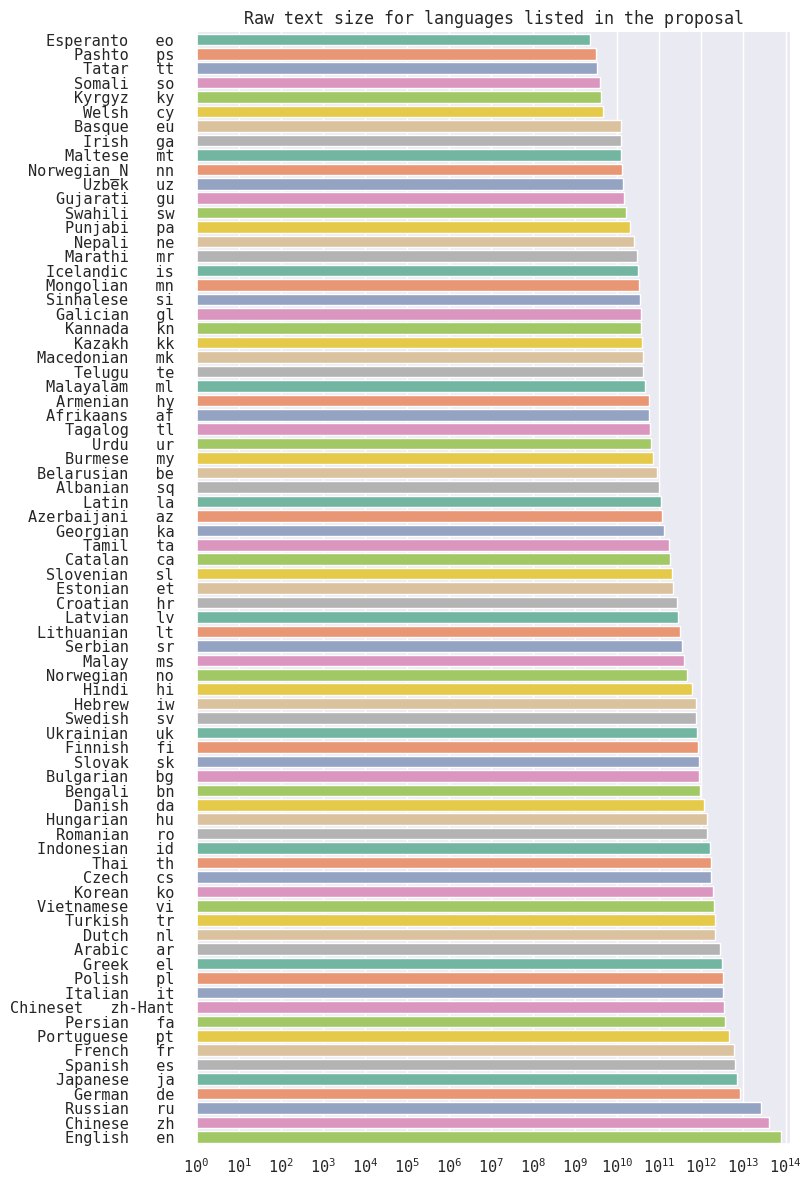

In [23]:
sum_plot_df = plot_df.groupby(['lang','lang-descr']).agg('sum').reset_index().sort_values(by='text_bytes')
plot_langs(sum_plot_df, part_col=None, height=12, aspect=0.7)
plt.title('Raw text size for languages listed in the proposal')

In [31]:
plot_df.columns

Index(['lang', 'text_newlines', 'text_wcwords', 'text_bytes', 'docs', 'crawl',
       'Code', 'Name', 'lang-descr', 'lang_props', 'set', 'text_bytes_prop'],
      dtype='object')

In [49]:
for c in ['text_newlines', 'text_wcwords', 'text_bytes', 'docs']:
    plot_df[c+'_prop'] = plot_df.groupby(['lang','lang-descr'])[c].transform(lambda r: r/r.sum())


In [50]:
ldf.groupby('crawl')['text_bytes'].agg('sum') / 2**40

crawl
cc40_filtered_stats_utf8          18.035444
wide00015_filtered_stats_utf8     38.150236
wide00016_filtered_stats         130.819103
wide00017_filtered_stats_utf8     43.648797
Name: text_bytes, dtype: float64

In [51]:
plot_df.groupby('crawl')['text_bytes'].agg('sum') / 2**40

crawl
cc40_filtered_stats_utf8          18.003182
wide00015_filtered_stats_utf8     38.121044
wide00016_filtered_stats         103.437194
wide00017_filtered_stats_utf8     43.617617
Name: text_bytes, dtype: float64

In [52]:
plot_df.crawl.str.replace('.*filter_stats','', regex=True)

192    wide00017_filtered_stats_utf8
193         wide00016_filtered_stats
194    wide00015_filtered_stats_utf8
195         cc40_filtered_stats_utf8
272    wide00015_filtered_stats_utf8
                   ...              
107    wide00017_filtered_stats_utf8
2      wide00017_filtered_stats_utf8
0           cc40_filtered_stats_utf8
1      wide00015_filtered_stats_utf8
3           wide00016_filtered_stats
Name: crawl, Length: 308, dtype: object

In [61]:
plot_df.groupby('crawl').sum() 

,lang,text_newlines,text_wcwords,text_bytes,docs,Code,Name,lang-descr,lang_props,set,text_bytes_prop,text_newlines_prop,text_wcwords_prop,docs_prop
crawl,,,,,,,,,,,,,,
cc40_filtered_stats_utf8,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,465775385639,2458190784964,19794708074401,2803140170,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,esperantopashtotatarsomalikyrgyzwelshbasqueiri...,Esperanto eo Pashto ps Tatar tt Somali ...,0.998211,306,11.437334,24.659842,25.636880,15.192304
wide00015_filtered_stats_utf8,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,1070133570666,4895873740723,41914531038119,5119199904,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,esperantopashtotatarsomalikyrgyzwelshbasqueiri...,Esperanto eo Pashto ps Tatar tt Somali ...,0.999235,306,13.732849,30.128624,31.860534,13.297991
wide00016_filtered_stats,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,10832970792,10832970792,113730397230436,10832970792,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,esperantopashtotatarsomalikyrgyzwelshbasqueiri...,Esperanto eo Pashto ps Tatar tt Somali ...,0.790689,306,43.349261,0.507294,0.105133,37.492695
wide00017_filtered_stats_utf8,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,1171948183481,4691282963049,47958076657507,10356987225,eopsttsokycyeugamtnnuzguswpanemrismnsiglknkkmk...,esperantopashtotatarsomalikyrgyzwelshbasqueiri...,Esperanto eo Pashto ps Tatar tt Somali ...,0.999286,306,8.480556,21.704241,19.397453,11.017010


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(118.8573330965908, 0.5, '')

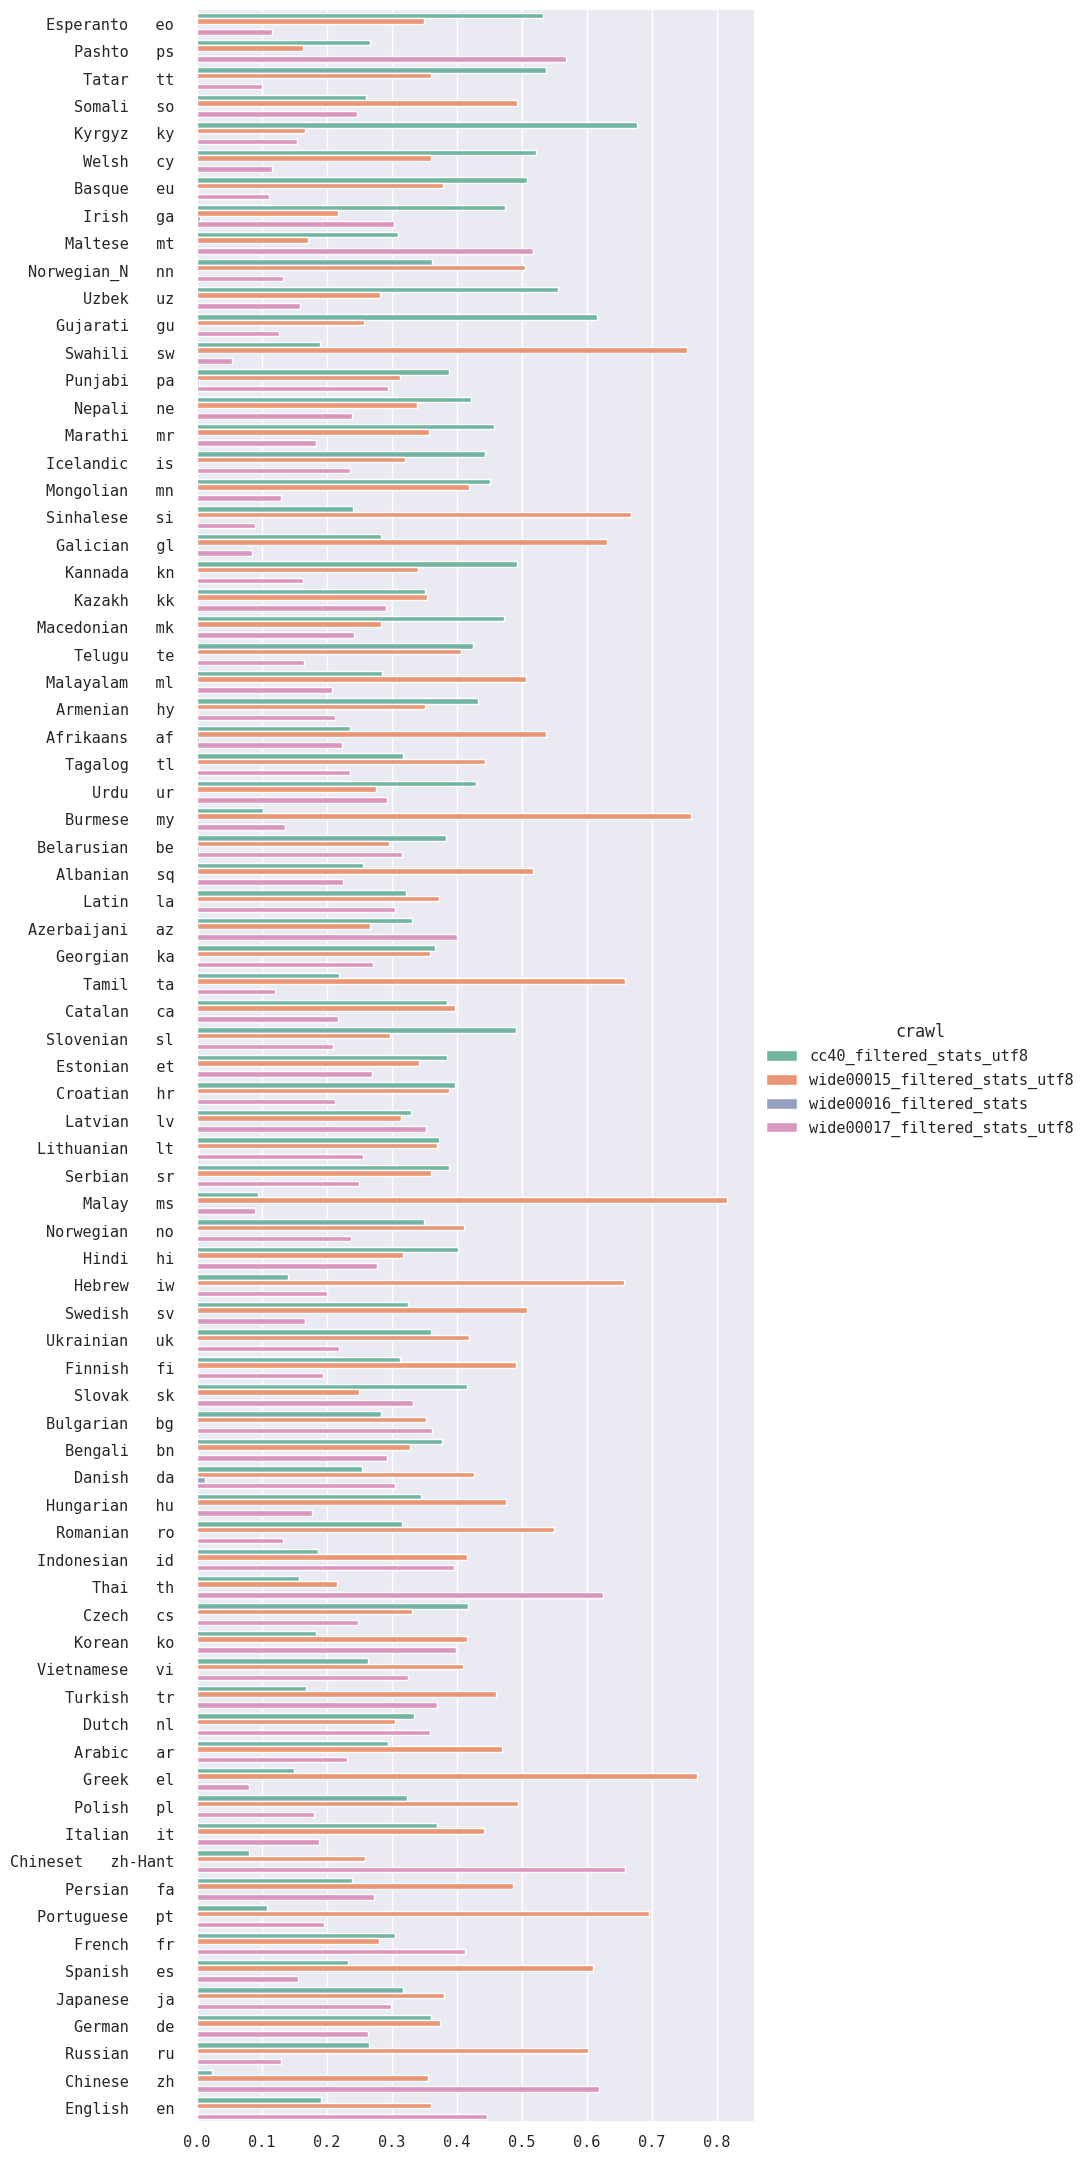

In [57]:
sns.set_context('notebook')
plot_langs(plot_df,stat_col='text_wcwords_prop', height=22, aspect=0.4, 
           logscale=False,xticks=None)
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(3.200000000000017, 0.5, '')

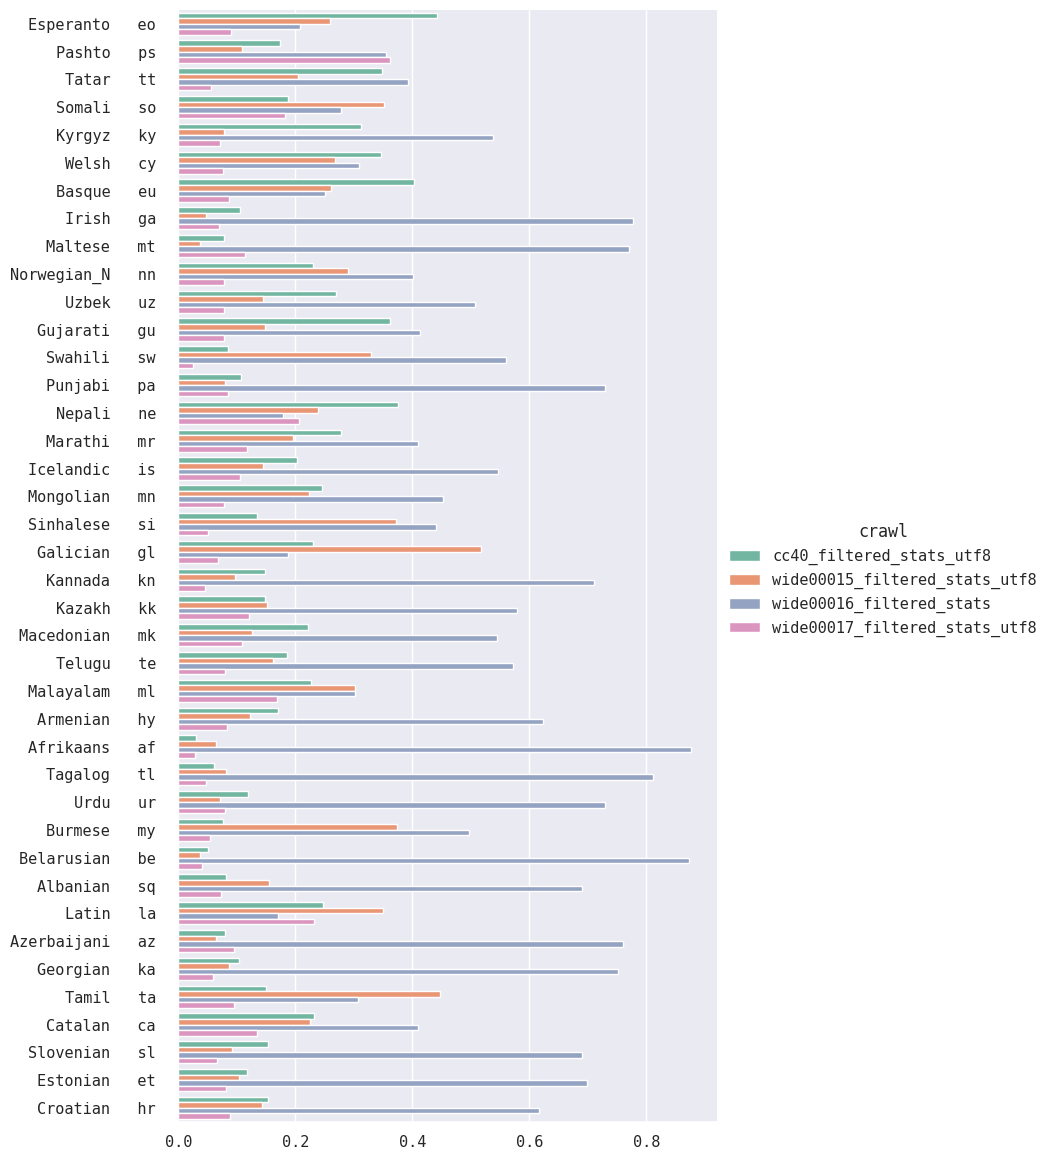

In [38]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs1)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop1.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(3.1999999999999886, 0.5, '')

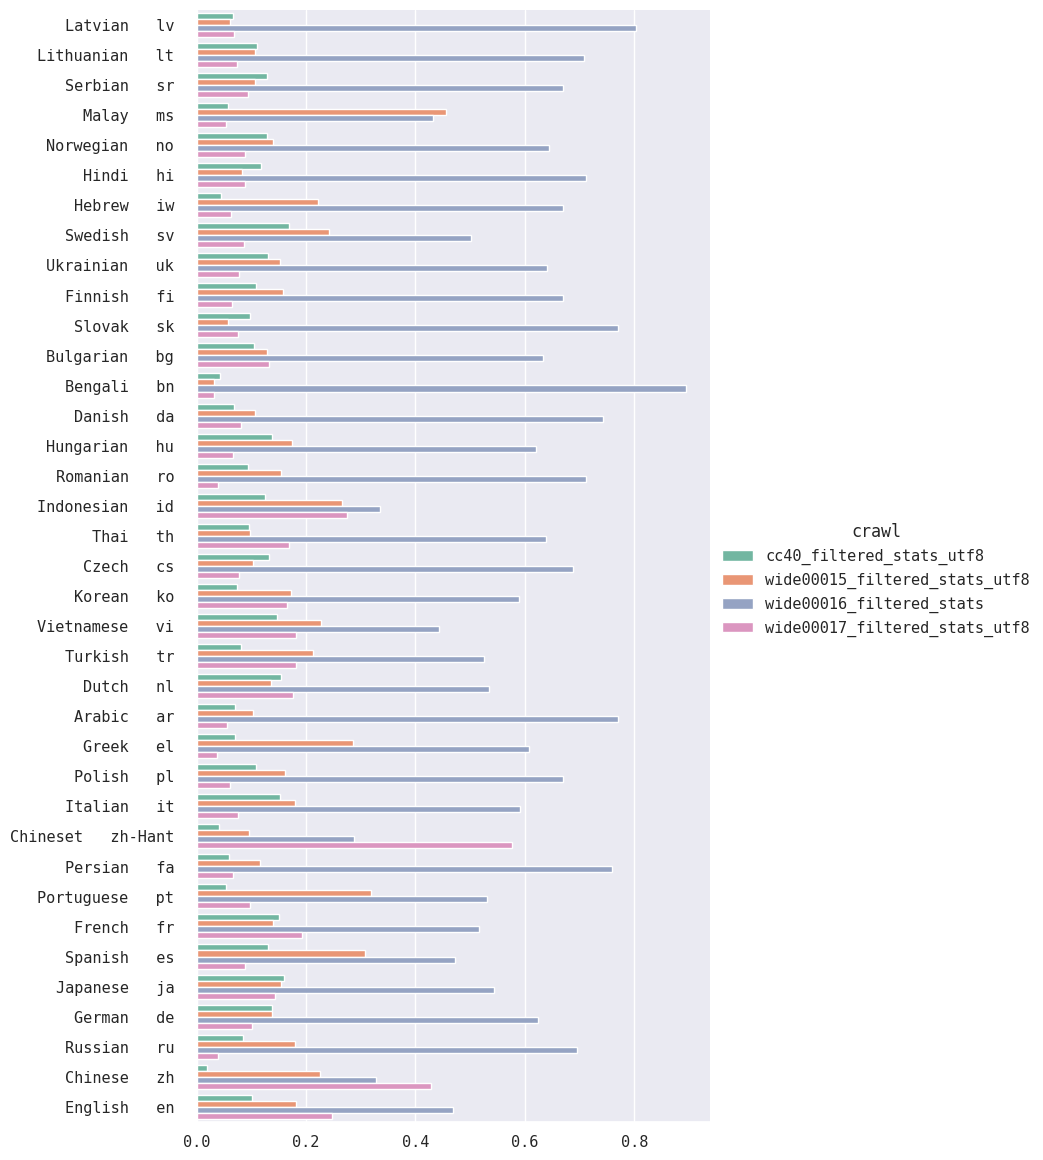

In [39]:
sns.set_context('notebook')
plot_langs(plot_df[plot_df.lang.isin(langs2)],stat_col='text_bytes_prop', height=12, aspect=0.7, 
           logscale=False,xticks=None, fpath='text_bytes_prop2.pdf')
plt.xlabel('')
plt.ylabel('')
# plt.title('Proportions of texts coming from each dataset for the languages listed in the proposal')